In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_valid = X_train_full[:5000]/255.0
X_train = X_train_full[5000:]/255.0
X_test = X_test/255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [4]:
from functools import partial

my_dense_layer = partial(tf.keras.layers.Dense, activation = "relu", kernel_initializer = 'he_uniform', kernel_regularizer = tf.keras.regularizers.l2(0.0001))
my_conv_layer = partial(tf.keras.layers.Conv2D, activation = 'relu', kernel_initializer = 'he_uniform', padding = "valid")

model = tf.keras.models.Sequential([
    my_conv_layer(32,(5,5),padding = "same", input_shape = [28,28,1]),
    tf.keras.layers.AveragePooling2D(2,2),
    my_conv_layer(64,(5,5)),
    tf.keras.layers.AveragePooling2D(2,2),
    my_conv_layer(128,(5,5)),
    tf.keras.layers.Flatten(),
    my_dense_layer(128),
    my_dense_layer(10, activation = "softmax")
])

In [5]:
model.compile(loss = "sparse_categorical_crossentropy", 
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

In [6]:
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 57s 1ms/sample - loss: 0.4784 - accuracy: 0.8292 - val_loss: 0.3315 - val_accuracy: 0.8872
Epoch 2/20
55000/55000 [==============================] - 56s 1ms/sample - loss: 0.3094 - accuracy: 0.8909 - val_loss: 0.3021 - val_accuracy: 0.8882
Epoch 3/20
55000/55000 [==============================] - 56s 1ms/sample - loss: 0.2669 - accuracy: 0.9065 - val_loss: 0.2621 - val_accuracy: 0.9066
Epoch 4/20
55000/55000 [==============================] - 56s 1ms/sample - loss: 0.2364 - accuracy: 0.9174 - val_loss: 0.2607 - val_accuracy: 0.9090
Epoch 5/20
55000/55000 [==============================] - 56s 1ms/sample - loss: 0.2128 - accuracy: 0.9250 - val_loss: 0.2314 - val_accuracy: 0.9198
Epoch 6/20
55000/55000 [==============================] - 56s 1ms/sample - loss: 0.1932 - accuracy: 0.9318 - val_loss: 0.2382 - val_accuracy: 0.9206
Epoch 7/20
55000/55000 [==============================] -

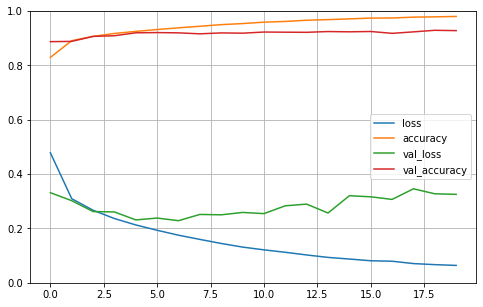

In [7]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [8]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train,y_pred)
print(conf_train)

[[5474    0   12    6    0    0   51    0    0    0]
 [   1 5440    0    3    0    0    0    0    0    0]
 [   8    1 5434    0   40    0   13    0    0    0]
 [   8    6    4 5464    3    0   14    0    0    0]
 [   2    5   80   52 5307    0   66    0    0    0]
 [   0    0    2    0    0 5504    0    1    0    0]
 [ 140    1  116    6   31    0 5213    0    0    0]
 [   0    0    0    0    0    2    0 5441    1   44]
 [   1    0    0    0    0    0    2    0 5507    0]
 [   0    0    0    0    0    1    0   16    0 5477]]


In [9]:
model.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.36339718243181707, 0.919]